Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Assignment 8.1 : Saving Models**
**Name** | Catorce, Mayah Mae A.
**Section** | CPE32S3
**Date Performed**: |April 15, 2024
**Date Submitted**: |April 19, 2024
**Instructor**: | Engr. Roman Richard

<hr>

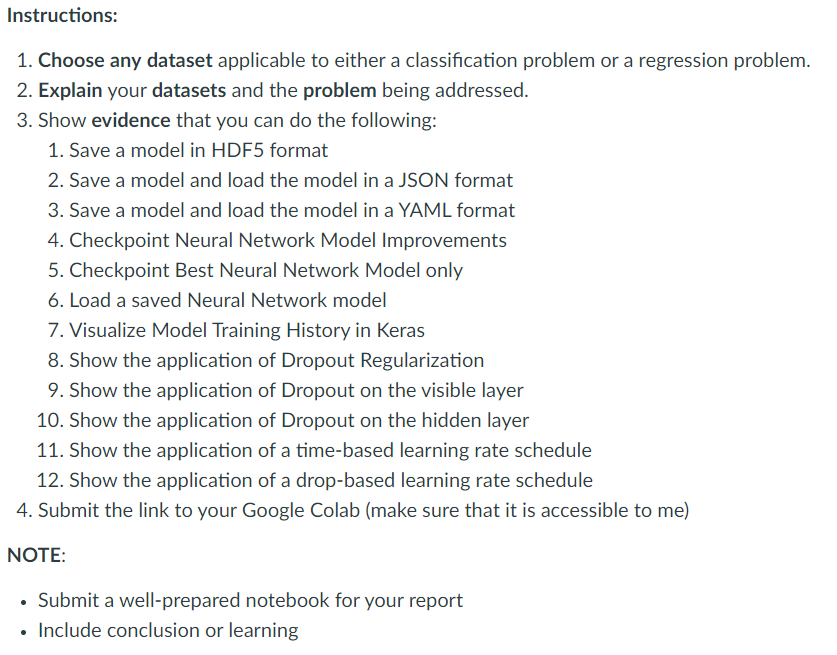

#Dataset Explanation and Problem being addressed

Classification,Regression: https://archive.ics.uci.edu/dataset/242/energy+efficiency

The dataset contains information gathered from simulations of 768 different building shapes using Ecotect software. Each building in the dataset is characterized by various parameters such as glazing area, glazing area distribution, orientation, and other features. The dataset consists of 8 features, and the goal is to predict two real-valued responses.

The problem being addressed with this dataset is likely related to energy analysis and building performance optimization. By simulating different building shapes and configurations, the dataset aims to understand how these factors influence energy consumption and overall building efficiency. The real-valued responses could represent metrics such as heating load and cooling load, which are essential for designing energy-efficient buildings.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
names=['Relative_Compactness','Surface_Area','Wall_Area','Roof_Area','Overall_Height','Orientation','Glazing_Area','Glazing_Area_Distribution','Heating_Load', 'Cooling_Load']
df = pd.read_excel('/content/drive/MyDrive/EMTECH2/ENB2012_data.xlsx',names=names)

In [ ]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df.columns


Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [ ]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Assuming df is your DataFrame containing the dataset
X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
        'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]
y = df[['Heating_Load', 'Cooling_Load']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Model Creation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError

model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))  # Hidden Layer
model.add(Dropout(0.25))
model.add(Dense(64, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))
model.add(Dense(32, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))
model.add(Dense(2, activation='linear'))  # Output Layer

model.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error on Test Set:", mae)


Epoch 1/100
22/22 [==============================] - 1s 11ms/step - loss: 553.9239 - mean_absolute_error: 21.3268 - val_loss: 458.8498 - val_mean_absolute_error: 19.4121
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 501.8754 - mean_absolute_error: 20.0592 - val_loss: 424.2011 - val_mean_absolute_error: 18.4942
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 470.0523 - mean_absolute_error: 19.2207 - val_loss: 397.7824 - val_mean_absolute_error: 17.7560
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 441.8940 - mean_absolute_error: 18.4754 - val_loss: 374.4741 - val_mean_absolute_error: 17.0804
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 419.4087 - mean_absolute_error: 17.8389 - val_loss: 352.7218 - val_mean_absolute_error: 16.4252
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 397.1814 - mean_absolute_error: 17.2186 - val_loss: 332.1736 - val_mean_absolute_

In [ ]:
pip install h5py

#Save a model and load the model in a JSON format


In [ ]:
from tensorflow.keras.models import Sequential, model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/EMTECH2/json_model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/EMTECH2/json_model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 86.85%


#Save a model and load the model in a YAML format


In [ ]:
from tensorflow.keras.models import Sequential, model_from_yaml

# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/EMTECH2/model_yaml.h5")
print("Saved model to disk")

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/EMTECH2/model_yaml.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 86.85%


#Save a model in HDF5 format


In [ ]:
model.save("/content/drive/MyDrive/EMTECH2/Keras_Model.h5")
print("Saved model to disk")

Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Checkpoint Neural Network Model Improvements


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError
import numpy as np
import tensorflow as tf

seed = 42
tf.random.set_seed(seed)

# Define the new model
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))  # Hidden Layer
model.add(Dropout(0.25))
model.add(Dense(64, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))
model.add(Dense(32, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))
model.add(Dense(2, activation='linear'))  # Output Layer

# Compile the model
model.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

# Define callbacks for checkpointing
filepath = "/content/drive/MyDrive/EMTECH2/weights-improvement-{epoch:02d}-{val_mean_absolute_error:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mean_absolute_error', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2, callbacks=callbacks_list)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error on Test Set:", mae)


Epoch 1/100
 9/22 [===========>..................] - ETA: 0s - loss: 551.3488 - mean_absolute_error: 21.4468 
Epoch 1: val_mean_absolute_error improved from inf to 20.08677, saving model to /content/drive/MyDrive/EMTECH2/weights-improvement-01-20.09.hdf5
22/22 [==============================] - 2s 24ms/step - loss: 585.9398 - mean_absolute_error: 22.0626 - val_loss: 485.4182 - val_mean_absolute_error: 20.0868
Epoch 2/100
17/22 [======================>.......] - ETA: 0s - loss: 536.6083 - mean_absolute_error: 20.9272

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mean_absolute_error improved from 20.08677 to 19.07078, saving model to /content/drive/MyDrive/EMTECH2/weights-improvement-02-19.07.hdf5
22/22 [==============================] - 0s 9ms/step - loss: 527.1257 - mean_absolute_error: 20.6718 - val_loss: 445.8136 - val_mean_absolute_error: 19.0708
Epoch 3/100
16/22 [====================>.........] - ETA: 0s - loss: 495.6715 - mean_absolute_error: 19.8062
Epoch 3: val_mean_absolute_error improved from 19.07078 to 18.34212, saving model to /content/drive/MyDrive/EMTECH2/weights-improvement-03-18.34.hdf5
22/22 [==============================] - 0s 15ms/step - loss: 491.0654 - mean_absolute_error: 19.7649 - val_loss: 418.7686 - val_mean_absolute_error: 18.3421
Epoch 4/100
19/22 [========================>.....] - ETA: 0s - loss: 464.8468 - mean_absolute_error: 19.0801
Epoch 4: val_mean_absolute_error improved from 18.34212 to 17.76196, saving model to /content/drive/MyDrive/EMTECH2/weights-improvement-04-17.76.hdf5
22/22 [=========

#Checkpoint Best Neural Network Model only


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError
from keras.callbacks import ModelCheckpoint

# Define the model
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))  # Hidden Layer
model.add(Dropout(0.25))
model.add(Dense(64, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))
model.add(Dense(32, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))
model.add(Dense(2, activation='linear'))  # Output Layer

model.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

# Define the checkpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/EMTECH2/best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Train the model with checkpoint
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2, callbacks=[checkpoint])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error on Test Set:", mae)


Epoch 1/100
 1/22 [>.............................] - ETA: 15s - loss: 495.0158 - mean_absolute_error: 20.4075
Epoch 1: val_loss improved from inf to 466.44113, saving model to /content/drive/MyDrive/EMTECH2/best_model.h5
22/22 [==============================] - 1s 13ms/step - loss: 566.3268 - mean_absolute_error: 21.6152 - val_loss: 466.4411 - val_mean_absolute_error: 19.5875
Epoch 2/100
 1/22 [>.............................] - ETA: 0s - loss: 339.4267 - mean_absolute_error: 16.3016
Epoch 2: val_loss improved from 466.44113 to 425.92825, saving model to /content/drive/MyDrive/EMTECH2/best_model.h5
22/22 [==============================] - 0s 6ms/step - loss: 507.2312 - mean_absolute_error: 20.1781 - val_loss: 425.9283 - val_mean_absolute_error: 18.5296
Epoch 3/100
 1/22 [>.............................] - ETA: 0s - loss: 341.4234 - mean_absolute_error: 16.0934

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss improved from 425.92825 to 396.43903, saving model to /content/drive/MyDrive/EMTECH2/best_model.h5
22/22 [==============================] - 0s 6ms/step - loss: 469.4733 - mean_absolute_error: 19.2004 - val_loss: 396.4390 - val_mean_absolute_error: 17.7228
Epoch 4/100
 1/22 [>.............................] - ETA: 0s - loss: 401.3747 - mean_absolute_error: 17.7109
Epoch 4: val_loss improved from 396.43903 to 372.76346, saving model to /content/drive/MyDrive/EMTECH2/best_model.h5
22/22 [==============================] - 0s 5ms/step - loss: 441.1293 - mean_absolute_error: 18.4455 - val_loss: 372.7635 - val_mean_absolute_error: 17.0424
Epoch 5/100
 1/22 [>.............................] - ETA: 0s - loss: 407.7068 - mean_absolute_error: 17.8009
Epoch 5: val_loss improved from 372.76346 to 352.77454, saving model to /content/drive/MyDrive/EMTECH2/best_model.h5
22/22 [==============================] - 0s 6ms/step - loss: 417.9108 - mean_absolute_error: 17.8187 - val_loss: 352

#Load a saved Neural Network model


In [ ]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/EMTECH2/best_model.h5')

# Now you can use this loaded model for making predictions or further evaluation


#Visualize Model Training History in Keras


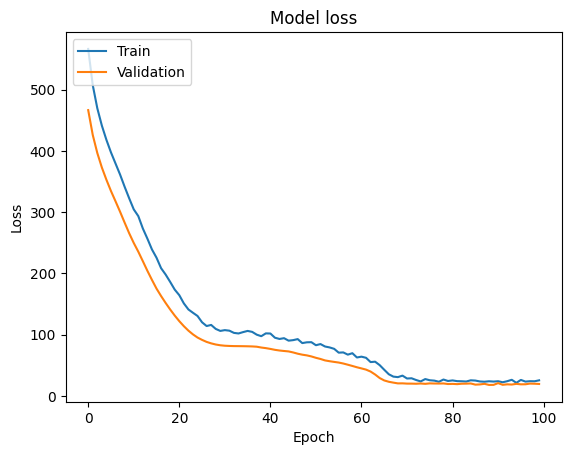

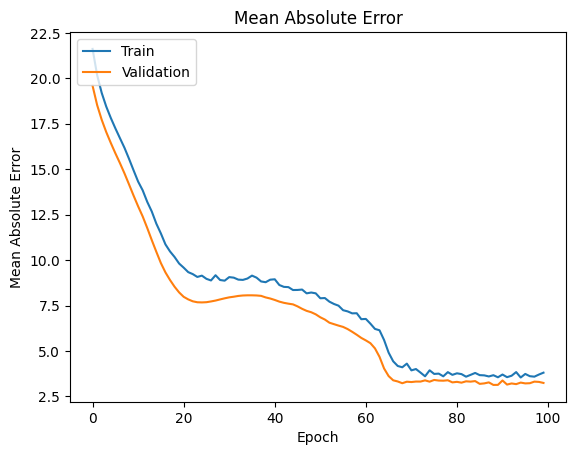

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation mean absolute error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#Show the application of Dropout Regularization


Epoch 1/100
22/22 [==============================] - 5s 87ms/step - loss: 597.7083 - mean_absolute_error: 22.3394 - val_loss: 497.7996 - val_mean_absolute_error: 20.4062
Epoch 2/100
22/22 [==============================] - 1s 24ms/step - loss: 542.2184 - mean_absolute_error: 21.0409 - val_loss: 462.3352 - val_mean_absolute_error: 19.5184
Epoch 3/100
22/22 [==============================] - 0s 20ms/step - loss: 510.4232 - mean_absolute_error: 20.2644 - val_loss: 437.4955 - val_mean_absolute_error: 18.8716
Epoch 4/100
22/22 [==============================] - 0s 18ms/step - loss: 485.5828 - mean_absolute_error: 19.6369 - val_loss: 416.0435 - val_mean_absolute_error: 18.2946
Epoch 5/100
22/22 [==============================] - 0s 20ms/step - loss: 465.4213 - mean_absolute_error: 19.1137 - val_loss: 396.9879 - val_mean_absolute_error: 17.7668
Epoch 6/100
22/22 [==============================] - 0s 13ms/step - loss: 445.0132 - mean_absolute_error: 18.5913 - val_loss: 378.7375 - val_mean_abso

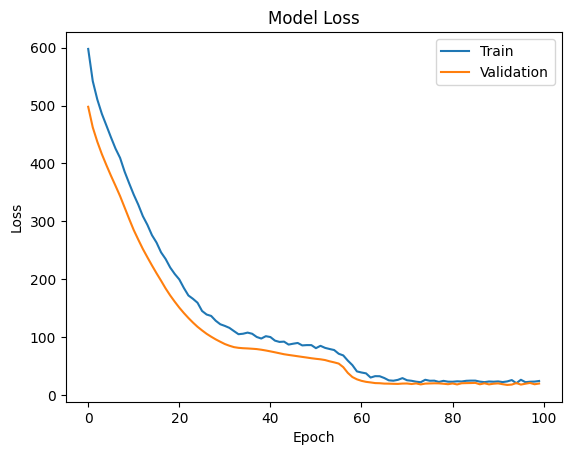

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Define the model with dropout regularization
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))  # Hidden Layer
model.add(Dropout(0.25))  # Dropout layer with dropout rate of 0.25
model.add(Dense(64, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))  # Dropout layer with dropout rate of 0.20
model.add(Dense(32, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))  # Dropout layer with dropout rate of 0.20
model.add(Dense(2, activation='linear'))  # Output Layer

# Compile the model
model.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error on Test Set:", mae)

# Visualize training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


#Show the application of Dropout on the visible layer


Epoch 1/100
22/22 [==============================] - 1s 18ms/step - loss: 537.7396 - mean_absolute_error: 20.9383 - val_loss: 443.0387 - val_mean_absolute_error: 18.9799
Epoch 2/100
22/22 [==============================] - 0s 10ms/step - loss: 483.4908 - mean_absolute_error: 19.5845 - val_loss: 409.1983 - val_mean_absolute_error: 18.0759
Epoch 3/100
22/22 [==============================] - 0s 13ms/step - loss: 453.0356 - mean_absolute_error: 18.7960 - val_loss: 384.2252 - val_mean_absolute_error: 17.3746
Epoch 4/100
22/22 [==============================] - 0s 13ms/step - loss: 429.0791 - mean_absolute_error: 18.1454 - val_loss: 363.2708 - val_mean_absolute_error: 16.7576
Epoch 5/100
22/22 [==============================] - 0s 9ms/step - loss: 407.6434 - mean_absolute_error: 17.5411 - val_loss: 344.0131 - val_mean_absolute_error: 16.1575
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 386.9381 - mean_absolute_error: 16.9391 - val_loss: 325.0807 - val_mean_absolu

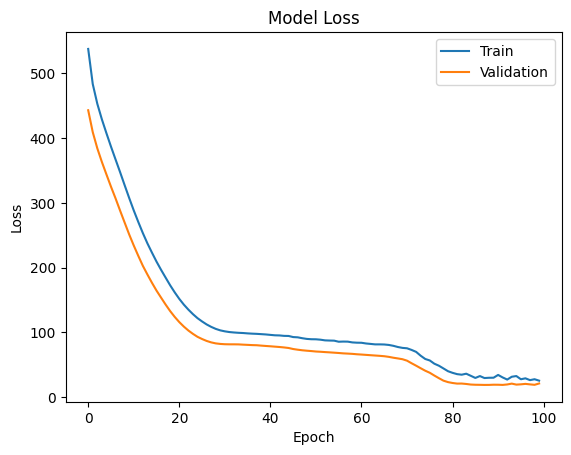

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Define the model with dropout regularization on the visible layer
model = Sequential()
model.add(Dropout(0.2, input_shape=(X_train.shape[1],)))  # Dropout layer applied to the input layer with dropout rate of 0.2
model.add(Dense(128, activation='sigmoid'))  # Hidden Layer
model.add(Dense(64, activation='sigmoid'))  # Hidden Layer
model.add(Dense(32, activation='sigmoid'))  # Hidden Layer
model.add(Dense(2, activation='linear'))  # Output Layer

# Compile the model
model.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error on Test Set:", mae)

# Visualize training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


#Show the application of Dropout on the hidden layer


Epoch 1/100
22/22 [==============================] - 2s 19ms/step - loss: 574.2574 - mean_absolute_error: 21.7953 - val_loss: 472.3544 - val_mean_absolute_error: 19.7740
Epoch 2/100
22/22 [==============================] - 0s 7ms/step - loss: 515.3492 - mean_absolute_error: 20.3838 - val_loss: 434.7289 - val_mean_absolute_error: 18.7985
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 481.3506 - mean_absolute_error: 19.5087 - val_loss: 407.6277 - val_mean_absolute_error: 18.0624
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 454.2360 - mean_absolute_error: 18.7987 - val_loss: 384.9214 - val_mean_absolute_error: 17.4196
Epoch 5/100
22/22 [==============================] - 0s 7ms/step - loss: 432.4416 - mean_absolute_error: 18.2057 - val_loss: 365.5522 - val_mean_absolute_error: 16.8521
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 411.4731 - mean_absolute_error: 17.6635 - val_loss: 346.6411 - val_mean_absolute_

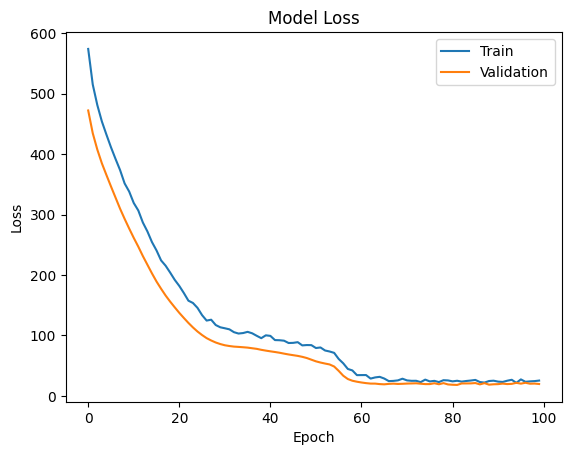

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Define the model with dropout regularization on hidden layers
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))  # Hidden Layer
model.add(Dropout(0.25))  # Dropout layer with dropout rate of 0.25
model.add(Dense(64, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))  # Dropout layer with dropout rate of 0.20
model.add(Dense(32, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))  # Dropout layer with dropout rate of 0.20
model.add(Dense(2, activation='linear'))  # Output Layer

# Compile the model
model.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error on Test Set:", mae)

# Visualize training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


#Show the application of a time-based learning rate schedule


Epoch 1/100
22/22 [==============================] - 3s 36ms/step - loss: 150.8955 - mean_absolute_error: 10.2589 - val_loss: 87.4047 - val_mean_absolute_error: 8.3965 - lr: 0.1000
Epoch 2/100
22/22 [==============================] - 0s 8ms/step - loss: 109.8895 - mean_absolute_error: 9.2721 - val_loss: 84.3820 - val_mean_absolute_error: 7.8172 - lr: 0.1000
Epoch 3/100
22/22 [==============================] - 0s 11ms/step - loss: 114.7884 - mean_absolute_error: 9.4130 - val_loss: 82.8196 - val_mean_absolute_error: 8.1658 - lr: 0.1000
Epoch 4/100
22/22 [==============================] - 0s 8ms/step - loss: 112.4353 - mean_absolute_error: 9.3441 - val_loss: 84.8335 - val_mean_absolute_error: 8.2897 - lr: 0.1000
Epoch 5/100
22/22 [==============================] - 0s 19ms/step - loss: 109.0140 - mean_absolute_error: 9.2932 - val_loss: 81.7825 - val_mean_absolute_error: 8.1073 - lr: 0.1000
Epoch 6/100
22/22 [==============================] - 0s 11ms/step - loss: 106.2849 - mean_absolute_er

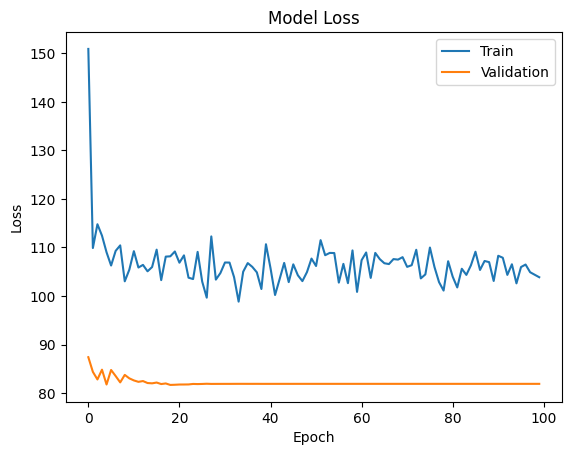

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import numpy as np

# Define the time-based learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.1
    decay = 0.1
    epochs_drop = 10
    lr = initial_lr * np.power(decay, np.floor((1 + epoch) / epochs_drop))
    return lr

# Define the model
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))  # Hidden Layer
model.add(Dropout(0.25))
model.add(Dense(64, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))
model.add(Dense(32, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))
model.add(Dense(2, activation='linear'))  # Output Layer

# Compile the model
model.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

# Define the learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with learning rate scheduler
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2, callbacks=[lr_scheduler])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error on Test Set:", mae)

# Visualize training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


#Show the application of a drop-based learning rate schedule


Epoch 1/100
22/22 [==============================] - 2s 32ms/step - loss: 167.0375 - mean_absolute_error: 10.5960 - val_loss: 86.6727 - val_mean_absolute_error: 8.3660 - lr: 0.1000
Epoch 2/100
22/22 [==============================] - 0s 14ms/step - loss: 109.2225 - mean_absolute_error: 9.2341 - val_loss: 82.4819 - val_mean_absolute_error: 7.9061 - lr: 0.1000
Epoch 3/100
22/22 [==============================] - 0s 15ms/step - loss: 111.3794 - mean_absolute_error: 9.2256 - val_loss: 83.8055 - val_mean_absolute_error: 8.2278 - lr: 0.1000
Epoch 4/100
22/22 [==============================] - 0s 20ms/step - loss: 112.0503 - mean_absolute_error: 9.3323 - val_loss: 83.9250 - val_mean_absolute_error: 8.2488 - lr: 0.1000
Epoch 5/100
22/22 [==============================] - 0s 13ms/step - loss: 111.1207 - mean_absolute_error: 9.2827 - val_loss: 81.5881 - val_mean_absolute_error: 8.0289 - lr: 0.1000
Epoch 6/100
22/22 [==============================] - 0s 15ms/step - loss: 110.8177 - mean_absolute_

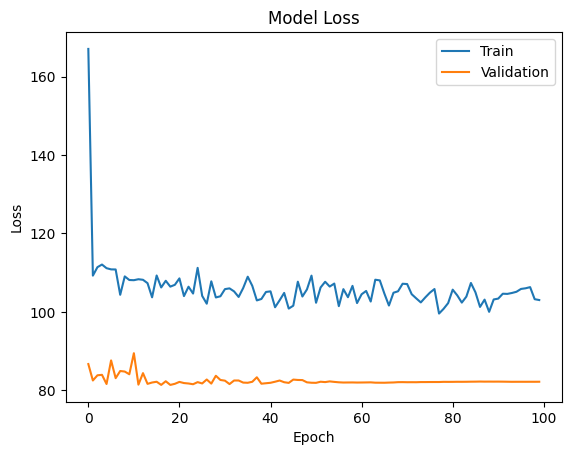

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError
from keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt

# Define the drop-based learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.1
    drop = 0.5
    epochs_drop = 10
    lr = initial_lr * np.power(drop, np.floor((1 + epoch) / epochs_drop))
    return lr

# Define the model
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))  # Hidden Layer
model.add(Dropout(0.25))
model.add(Dense(64, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))
model.add(Dense(32, activation='sigmoid'))  # Hidden Layer
model.add(Dropout(0.20))
model.add(Dense(2, activation='linear'))  # Output Layer

# Compile the model
model.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

# Define the learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with learning rate scheduler
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2, callbacks=[lr_scheduler])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error on Test Set:", mae)

# Visualize training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


#Conclusion and Learning

In this laboratory activity, I have performed an application of a drop-based learning rate schedule training neural network models using Keras. This offers a dynamic approach to adjusting the learning rate during training which contributes to improved model convergence and performance. As I perfrom the steps there are several learnings I have attained. First, I have learned about the importance of regularization techniques, such as dropout which helps in mitigating overfitting within the neural network models. By introducing droupout layers after each of the hidden layers, I have facilitated the models ability to generalize patterns learned from the training data to unseen data which enhances the overall robustness. I have also learned how to save the model in different formats including the HDF5, JSON, and YAML, enabling easy storage ande retrieval for future use. Also I have explored the checkpointing techniques to save the model progress during training, that allows to resume training drom the last saved point or select the best-performing model based on validation metrics. The visualization also helped me to understand the learning process and identify potential issues like overfitting. Overall, this activity enhanced the effectiveness and efficiency of neural network models, contributing to more reliable and accurate predictions in various applications.

In [ ]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')